# 37. Plot and summarize MWAS stage 2 outputs

## Test for one

In [1]:
library(data.table)
library(parallel)

In [2]:
library(data.table)

dir <- "/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud/"

# List of files
data_files <- list.files(dir, full.names = TRUE, pattern = "gwas_stat_bp_alleleprocessed_a3")
data_files <- data_files[grepl("csv", data_files)]

In [3]:
data_files_alt_name <- gsub("-caud", "", data_files)

In [4]:
library(stringr)

# Split the file paths based on '-' and '_', keeping all parts
result_table <- data.table(str_split_fixed(data_files_alt_name, "[-_]", n = Inf))
result_table$path <- data_files
result_table$chr <- as.numeric(gsub("chr", "", result_table$V5))
head(result_table)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V17,V18,V19,V20,V21,V22,V23,V24,path,chr
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output,EXPANSE,dt,caud//libd,chr1,chr1,AA,libd,chr1,chr1,⋯,20240416,154932,gwas,stat,bp,alleleprocessed,a3,results.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1008982-1028981-dynamic-1corestotal-allcorepera-20240416-154932_gwas_stat_bp_alleleprocessed_a3_results.csv,1
/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output,EXPANSE,dt,caud//libd,chr1,chr1,AA,libd,chr1,chr1,⋯,20240510,131051,gwas,stat,bp,alleleprocessed,a3,results.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1008982-1028981-dynamic-1corestotal-allcorepera-caud-20240510-131051_gwas_stat_bp_alleleprocessed_a3_results.csv,1
/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output,EXPANSE,dt,caud//libd,chr1,chr1,AA,libd,chr1,chr1,⋯,20240415,140831,gwas,stat,bp,alleleprocessed,a3,results.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1028982-1048981-dynamic-1corestotal-allcorepera-20240415-140831_gwas_stat_bp_alleleprocessed_a3_results.csv,1
/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output,EXPANSE,dt,caud//libd,chr1,chr1,AA,libd,chr1,chr1,⋯,20240510,131153,gwas,stat,bp,alleleprocessed,a3,results.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1028982-1048981-dynamic-1corestotal-allcorepera-caud-20240510-131153_gwas_stat_bp_alleleprocessed_a3_results.csv,1
/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output,EXPANSE,dt,caud//libd,chr1,chr1,AA,libd,chr1,chr1,⋯,20240415,141231,gwas,stat,bp,alleleprocessed,a3,results.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1048982-1068981-dynamic-1corestotal-allcorepera-20240415-141231_gwas_stat_bp_alleleprocessed_a3_results.csv,1
/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output,EXPANSE,dt,caud//libd,chr1,chr1,AA,libd,chr1,chr1,⋯,20240510,131254,gwas,stat,bp,alleleprocessed,a3,results.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1048982-1068981-dynamic-1corestotal-allcorepera-caud-20240510-131254_gwas_stat_bp_alleleprocessed_a3_results.csv,1


In [5]:
result_table[, 4:10] <- NULL

In [6]:
levels(factor(result_table$V23))

[1] "a3"

In [7]:
head(result_table)

V1,V2,V3,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,path,chr
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output,EXPANSE,dt,AA,1008982,1028981,dynamic,1corestotal,allcorepera,20240416,154932,gwas,stat,bp,alleleprocessed,a3,results.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1008982-1028981-dynamic-1corestotal-allcorepera-20240416-154932_gwas_stat_bp_alleleprocessed_a3_results.csv,1
/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output,EXPANSE,dt,AA,1008982,1028981,dynamic,1corestotal,allcorepera,20240510,131051,gwas,stat,bp,alleleprocessed,a3,results.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1008982-1028981-dynamic-1corestotal-allcorepera-caud-20240510-131051_gwas_stat_bp_alleleprocessed_a3_results.csv,1
/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output,EXPANSE,dt,AA,1028982,1048981,dynamic,1corestotal,allcorepera,20240415,140831,gwas,stat,bp,alleleprocessed,a3,results.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1028982-1048981-dynamic-1corestotal-allcorepera-20240415-140831_gwas_stat_bp_alleleprocessed_a3_results.csv,1
/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output,EXPANSE,dt,AA,1028982,1048981,dynamic,1corestotal,allcorepera,20240510,131153,gwas,stat,bp,alleleprocessed,a3,results.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1028982-1048981-dynamic-1corestotal-allcorepera-caud-20240510-131153_gwas_stat_bp_alleleprocessed_a3_results.csv,1
/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output,EXPANSE,dt,AA,1048982,1068981,dynamic,1corestotal,allcorepera,20240415,141231,gwas,stat,bp,alleleprocessed,a3,results.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1048982-1068981-dynamic-1corestotal-allcorepera-20240415-141231_gwas_stat_bp_alleleprocessed_a3_results.csv,1
/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output,EXPANSE,dt,AA,1048982,1068981,dynamic,1corestotal,allcorepera,20240510,131254,gwas,stat,bp,alleleprocessed,a3,results.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1048982-1068981-dynamic-1corestotal-allcorepera-caud-20240510-131254_gwas_stat_bp_alleleprocessed_a3_results.csv,1


In [8]:
result_table[, 7:9] <- NULL

In [9]:
result_table[, V17 := as.Date(V17, format="%Y%m%d")]

# Filter to keep only the row with the most recent date for each V12
result_table <- result_table[result_table[, .I[which.max(V17)], by=V12]$V1]

# Sanity check to ensure no duplicate dates for any V12
dupes_check <- result_table[, .N, by=.(V12, V17)][N > 1]

if (nrow(dupes_check) > 0) {
    stop("Sanity check failed: Multiple datasets found for the same V12 on the same date.")
}

In [10]:
result_table

V1,V2,V3,V11,V12,V13,V17,V18,V19,V20,V21,V22,V23,V24,path,chr
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output,EXPANSE,dt,AA,1008982,1028981,2024-05-10,131051,gwas,stat,bp,alleleprocessed,a3,results.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1008982-1028981-dynamic-1corestotal-allcorepera-caud-20240510-131051_gwas_stat_bp_alleleprocessed_a3_results.csv,1
/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output,EXPANSE,dt,AA,1028982,1048981,2024-05-10,131153,gwas,stat,bp,alleleprocessed,a3,results.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1028982-1048981-dynamic-1corestotal-allcorepera-caud-20240510-131153_gwas_stat_bp_alleleprocessed_a3_results.csv,1
/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output,EXPANSE,dt,AA,1048982,1068981,2024-05-10,131254,gwas,stat,bp,alleleprocessed,a3,results.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1048982-1068981-dynamic-1corestotal-allcorepera-caud-20240510-131254_gwas_stat_bp_alleleprocessed_a3_results.csv,1
/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output,EXPANSE,dt,AA,1068982,1088981,2024-05-10,131355,gwas,stat,bp,alleleprocessed,a3,results.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1068982-1088981-dynamic-1corestotal-allcorepera-caud-20240510-131355_gwas_stat_bp_alleleprocessed_a3_results.csv,1
/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output,EXPANSE,dt,AA,1088982,1108981,2024-05-10,131456,gwas,stat,bp,alleleprocessed,a3,results.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1088982-1108981-dynamic-1corestotal-allcorepera-caud-20240510-131456_gwas_stat_bp_alleleprocessed_a3_results.csv,1
/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output,EXPANSE,dt,AA,108982,128981,2024-05-10,122451,gwas,stat,bp,alleleprocessed,a3,results.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud//libd_chr1-chr1_AA-libd_chr1-chr1_AA-108982-128981-dynamic-1corestotal-allcorepera-caud-20240510-122451_gwas_stat_bp_alleleprocessed_a3_results.csv,1
/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output,EXPANSE,dt,AA,1108982,1128981,2024-05-10,131557,gwas,stat,bp,alleleprocessed,a3,results.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1108982-1128981-dynamic-1corestotal-allcorepera-caud-20240510-131557_gwas_stat_bp_alleleprocessed_a3_results.csv,1
/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output,EXPANSE,dt,AA,1128982,1148981,2024-05-10,131658,gwas,stat,bp,alleleprocessed,a3,results.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1128982-1148981-dynamic-1corestotal-allcorepera-caud-20240510-131658_gwas_stat_bp_alleleprocessed_a3_results.csv,1
/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output,EXPANSE,dt,AA,1148982,1168981,2024-05-10,131807,gwas,stat,bp,alleleprocessed,a3,results.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1148982-1168981-dynamic-1corestotal-allcorepera-caud-20240510-131807_gwas_stat_bp_alleleprocessed_a3_results.csv,1


In [11]:
data_files <- result_table$path

In [12]:
# Initialize an empty list to store data tables
data_list <- list()

# Read and combine data files using a for loop
for (i in seq_along(data_files)) {
  data_list[[i]] <- fread(data_files[i])
  data_list[[i]]$chr <- result_table[i]$chr
}

# Combine the data tables into one
combined_data <- rbindlist(data_list)

In [13]:
head(combined_data)

z,p,n,bp,chr
<dbl>,<dbl>,<int>,<dbl>,<dbl>
-0.4741791,0.6353722,7,89222649,1
-0.4919653,0.6227439,8,89223098,1
-0.4803907,0.6309496,8,89223126,1
-0.4887827,0.6249956,8,89223181,1
-0.5029845,0.6149752,9,89223534,1
-0.5033291,0.6147329,9,89223545,1


In [14]:
dim(combined_data)

[1] 11058391        5

In [15]:
num_cores <- 6

In [16]:
# Read and combine correlation files in parallel
cor_files <- list.files(dir, full.names = TRUE, pattern = "eval")
cor_list <- mclapply(cor_files, fread, mc.cores = num_cores)
combined_cor <- rbindlist(cor_list)

In [17]:
dim(combined_data)

[1] 11058391        5

In [18]:
object.size(combined_data)

398103992 bytes

In [19]:
colnames(combined_data)[4] <- "cg"

In [20]:
head(combined_data)

z,p,n,cg,chr
<dbl>,<dbl>,<int>,<dbl>,<dbl>
-0.4741791,0.6353722,7,89222649,1
-0.4919653,0.6227439,8,89223098,1
-0.4803907,0.6309496,8,89223126,1
-0.4887827,0.6249956,8,89223181,1
-0.5029845,0.6149752,9,89223534,1
-0.5033291,0.6147329,9,89223545,1


In [21]:
head(combined_cor)

chr,cg,cor,mse
<int>,<int>,<dbl>,<dbl>
1,89222649,0.7096084,0.0005293503
1,89223098,0.6528120,0.0004423328
1,89223126,0.6563889,0.0004528511
1,89223181,0.6561869,0.0004366433
1,89223534,0.4716220,0.0004272574
1,89223545,0.5290709,0.0004055481


In [22]:
merged <- merge(combined_data, combined_cor)

In [23]:
head(merged)

cg,chr,z,p,n,cor,mse
<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
30634,16,1.28883811,0.1974544,1,0.25432590,0.017785923
30775,16,1.28883811,0.1974544,1,0.04925774,0.017422230
30815,16,1.28883811,0.1974544,1,0.02802516,0.016976908
30815,16,1.28883811,0.1974544,1,0.10057976,0.009279626
31362,16,0.04758947,0.9620434,2,0.11971228,0.014377374
31362,16,0.04758947,0.9620434,2,0.19592788,0.004897705


In [24]:
merged <- merged[which(merged$cor >= 0.1), ]

In [25]:
head(merged)

cg,chr,z,p,n,cor,mse
<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
30634,16,1.28883811,0.1974544,1,0.2543259,0.017785923
30815,16,1.28883811,0.1974544,1,0.1005798,0.009279626
31362,16,0.04758947,0.9620434,2,0.1197123,0.014377374
31362,16,0.04758947,0.9620434,2,0.1959279,0.004897705
31640,16,0.38694123,0.6987997,1,0.3064208,0.013257713
31640,16,0.38694123,0.6987997,1,0.1025836,0.010653258


In [26]:
dim(merged)

[1] 27902989        7

In [27]:
library(qqman)



For example usage please run: vignette('qqman')



Citation appreciated but not required:

Turner, (2018). qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. Journal of Open Source Software, 3(25), 731, https://doi.org/10.21105/joss.00731.





In [28]:
?manhattan

manhattan {qqman},R Documentation
x,"A data.frame with columns ""BP,"" ""CHR,"" ""P,"" and optionally, ""SNP."""
chr,"A string denoting the column name for the chromosome. Defaults to PLINK's ""CHR."" Said column must be numeric. If you have X, Y, or MT chromosomes, be sure to renumber these 23, 24, 25, etc."
bp,"A string denoting the column name for the chromosomal position. Defaults to PLINK's ""BP."" Said column must be numeric."
p,"A string denoting the column name for the p-value. Defaults to PLINK's ""P."" Said column must be numeric."
snp,"A string denoting the column name for the SNP name (rs number). Defaults to PLINK's ""SNP."" Said column should be a character."
col,A character vector indicating which colors to alternate.
chrlabs,"A character vector equal to the number of chromosomes specifying the chromosome labels (e.g., c(1:22, ""X"", ""Y"", ""MT""))."
suggestiveline,"Where to draw a ""suggestive"" line. Default -log10(1e-5). Set to FALSE to disable."
genomewideline,"Where to draw a ""genome-wide sigificant"" line. Default -log10(5e-8). Set to FALSE to disable."
highlight,A character vector of SNPs in your dataset to highlight. These SNPs should all be in your dataset.


In [29]:
merged_subset <- merged[which(merged$p <= 0.01), ]

In [30]:
merged_subset$SNP <- paste0(merged_subset$chr, ":", merged_subset$cg)

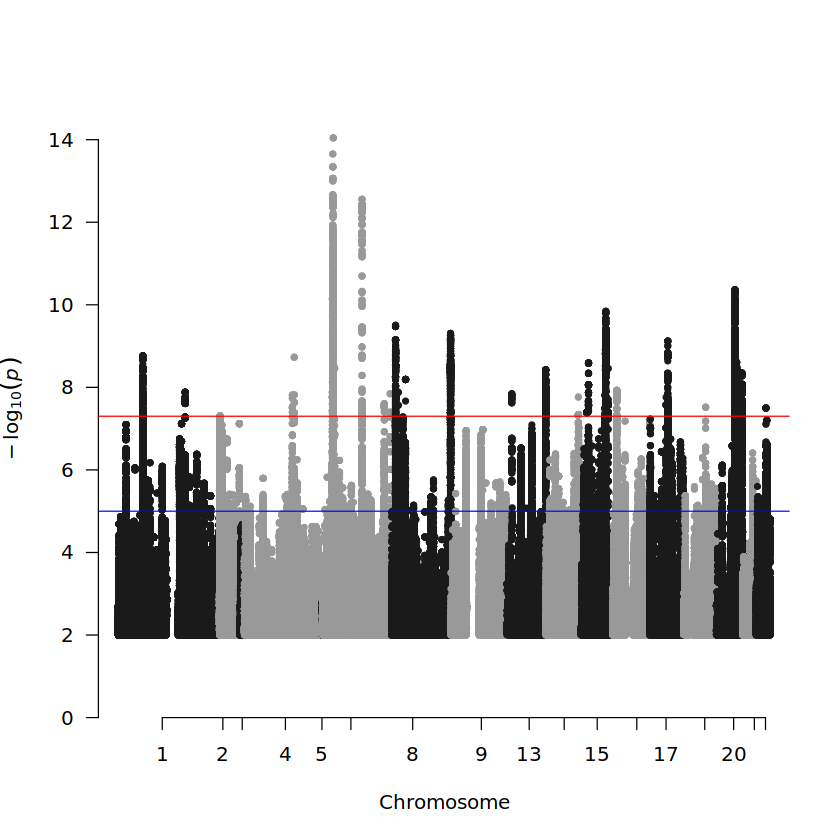

In [31]:
manhattan(merged_subset, chr = "chr", bp = "cg", p = "p")

In [32]:
merged_subset <- merged_subset[order(merged_subset$p), ]

In [33]:
head(merged_subset)

cg,chr,z,p,n,cor,mse,SNP
<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>
28108387,6,-7.751834,9.057493e-15,26,0.3011241,0.0006104186,6:28108387
28108387,6,-7.751834,9.057493e-15,26,0.3411534,0.0007490900,6:28108387
28108387,6,-7.751834,9.057493e-15,26,0.2856038,0.0007539123,6:28108387
26964584,6,7.637330,2.217723e-14,1,0.1793727,0.0013236780,6:26964584
26964584,6,7.637330,2.217723e-14,1,0.2276840,0.0013854278,6:26964584
26977663,6,7.544125,4.553338e-14,1,0.3353479,0.0002062449,6:26977663


In [34]:
fwrite(merged_subset, "37-OUT_first_look_bp_results.csv")

## Functionalize

In [35]:
# Count data files for each

# Load necessary libraries
library(data.table)
library(parallel)
library(qqman)
library(ggplot2)

# Define variables
desired_subpopulations <- c("AA", "EA", "all")
desired_regions <- c("caud", "hippo", "dlpfc")
traits <- c("scz", "bp", "mdd")

num_cores <- 6

# Loop over subpopulations, regions, and traits
for (desired_subpopulation in desired_subpopulations) {
  for (desired_region in desired_regions) {
    for (trait in traits) {
      
      # Define directory path
      dir <- paste0("/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_", desired_region, "/")
      
      # List and filter data files
      data_files <- list.files(dir, full.names = TRUE, pattern = paste0("gwas_stat_", trait, "_alleleprocessed_a3"))
      data_files <- data_files[grepl("csv", data_files)]

      print(desired_subpopulation)
      print(desired_region)
      print(trait)
      print(length(data_files))
    }
  }
}

[1] "AA"
[1] "caud"
[1] "scz"
[1] 5235
[1] "AA"
[1] "caud"
[1] "bp"
[1] 5235
[1] "AA"
[1] "caud"
[1] "mdd"
[1] 5235
[1] "AA"
[1] "hippo"
[1] "scz"
[1] 5342
[1] "AA"
[1] "hippo"
[1] "bp"
[1] 5342
[1] "AA"
[1] "hippo"
[1] "mdd"
[1] 5342
[1] "AA"
[1] "dlpfc"
[1] "scz"
[1] 5467
[1] "AA"
[1] "dlpfc"
[1] "bp"
[1] 5467
[1] "AA"
[1] "dlpfc"
[1] "mdd"
[1] 5467
[1] "EA"
[1] "caud"
[1] "scz"
[1] 5235
[1] "EA"
[1] "caud"
[1] "bp"
[1] 5235
[1] "EA"
[1] "caud"
[1] "mdd"
[1] 5235
[1] "EA"
[1] "hippo"
[1] "scz"
[1] 5342
[1] "EA"
[1] "hippo"
[1] "bp"
[1] 5342
[1] "EA"
[1] "hippo"
[1] "mdd"
[1] 5342
[1] "EA"
[1] "dlpfc"
[1] "scz"
[1] 5467
[1] "EA"
[1] "dlpfc"
[1] "bp"
[1] 5467
[1] "EA"
[1] "dlpfc"
[1] "mdd"
[1] 5467
[1] "all"
[1] "caud"
[1] "scz"
[1] 5235
[1] "all"
[1] "caud"
[1] "bp"
[1] 5235
[1] "all"
[1] "caud"
[1] "mdd"
[1] 5235
[1] "all"
[1] "hippo"
[1] "scz"
[1] 5342
[1] "all"
[1] "hippo"
[1] "bp"
[1] 5342
[1] "all"
[1] "hippo"
[1] "mdd"
[1] 5342
[1] "all"
[1] "dlpfc"
[1] "scz"
[1] 5467
[1] "all"


In [1]:
# Load necessary libraries
library(data.table)
library(parallel)
library(qqman)
library(ggplot2)

# Define variables
desired_subpopulations <- c("AA", "EA", "all")
desired_regions <- c("caud", "hippo", "dlpfc")
traits <- c("scz", "bp", "mdd")

num_cores <- 6

# Loop over subpopulations, regions, and traits
for (desired_subpopulation in desired_subpopulations) {
  for (desired_region in desired_regions) {
    for (trait in traits) {
      
      # Define directory path
      dir <- paste0("/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_", desired_region, "/")
      
      # List and filter data files
      data_files <- list.files(dir, full.names = TRUE, pattern = paste0("gwas_stat_", trait, "_alleleprocessed_a3"))
      data_files <- data_files[grepl("csv", data_files)]
      data_files_alt_name <- gsub(paste0("-", desired_region), "", data_files)
      
      # Create result table
      result_table <- data.table(str_split_fixed(data_files_alt_name, "[-_]", n = Inf))
      result_table$path <- data_files
      result_table$chr <- as.numeric(gsub("chr", "", result_table$V5))
      result_table <- result_table[which(result_table$V7 == desired_subpopulation)]
      
      # Filter by most recent date
      result_table[, V17 := as.Date(V17, format="%Y%m%d")]
      result_table <- result_table[result_table[, .I[which.max(V17)], by=V12]$V1]
      
      # Sanity check for duplicates
      dupes_check <- result_table[, .N, by=.(V12, V17)][N > 1]
      if (nrow(dupes_check) > 0) {
        stop("Sanity check failed: Multiple datasets found for the same V12 on the same date.")
      }
      
      # Combine data files
      data_files <- result_table$path
      data_list <- list()
      for (i in seq_along(data_files)) {
        data_list[[i]] <- fread(data_files[i])
        data_list[[i]]$chr <- result_table[i]$chr
      }
      combined_data <- rbindlist(data_list)
      
      # Combine correlation files
      cor_files <- list.files(dir, full.names = TRUE, pattern = "eval")
      cor_list <- mclapply(cor_files, fread, mc.cores = num_cores)
      combined_cor <- rbindlist(cor_list)
      
      # Merge datasets
      colnames(combined_data)[4] <- "cg"
      merged <- merge(combined_data, combined_cor)
      merged <- merged[which(merged$cor >= 0.1), ]
      merged_subset <- merged[which(merged$p <= 0.01), ]
      merged_subset$SNP <- paste0(merged_subset$chr, ":", merged_subset$cg)
      
      # Create output directory
      dir.create("37-OUT", showWarnings = FALSE)
      
      # Bonferroni correction
      bonferroni_threshold <- 0.05 / nrow(merged)
      bonferroni_pass <- merged[merged$p <= bonferroni_threshold, ]
      
      # Save filtered and unfiltered data
      fwrite(merged_subset, file.path("37-OUT", paste0("filtered_", trait, "_results_a2_", desired_subpopulation, "_", desired_region, ".csv")))
      fwrite(merged,
             file.path("37-OUT", paste0("unfiltered_", trait, "_results_a2_", desired_subpopulation, "_", desired_region, ".csv")))
      fwrite(merged_subset[which(merged_subset$p <= bonferroni_pass), ],
             file.path("37-OUT", paste0("filtered-bonf_", trait, "_results_a2_", desired_subpopulation, "_", desired_region, ".csv")))

      # Save Manhattan plot
      manhattan(merged_subset, chr = "chr", bp = "cg", p = "p", main = paste("Manhattan plot for", trait, desired_subpopulation, desired_region))
      ggsave(file.path("37-OUT", paste0("manhattan_", trait, "_", desired_subpopulation, "_", desired_region, ".png")))
      
      # Create and save QQ plot
      qq <- ggplot(merged, aes(sample = -log10(p))) +
        stat_qq() +
        stat_qq_line() +
        ggtitle(paste("QQ plot for", trait, desired_subpopulation, desired_region))
      ggsave(file.path("37-OUT", paste0("qqplot_", trait, "_", desired_subpopulation, "_", desired_region, ".png")), plot = qq)
    }
  }
}



For example usage please run: vignette('qqman')



Citation appreciated but not required:

Turner, (2018). qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. Journal of Open Source Software, 3(25), 731, https://doi.org/10.21105/joss.00731.





ERROR: Error in str_split_fixed(data_files_alt_name, "[-_]", n = Inf): could not find function "str_split_fixed"
